In [4]:
import dtdpTdm as dtdp
import os
import re
from os.path import join

dir = 'Corpus'

out = open( 'data.csv' , 'w' )

out.write( 'title,tokens,sentences,syllables\n' )

for file in os.listdir( dir ):
    if re.search( r'[.]txt' , file ):
        out.write( file )
        print( "Analysing " + file + " ... " )
        out.write( ',')
        fullPath = join( dir , file )
        out.write( str( dtdp.numberOfTokens( fullPath ) )) 
        out.write( ',')
        out.write( str( dtdp.numberOfSentences( fullPath ) )) 
        out.write( ',')      
        out.write( str( dtdp.numberOfSyllables( fullPath ) )) 
        out.write( '\n')
        
out.close()

Analysing ARoomWithaView.txt ... 
Analysing ATaleofTwoCities.txt ... 
Analysing HeartofDarkness.txt ... 
Analysing Ivanhoe.txt ... 
Analysing MobyDick.txt ... 
Analysing PrideandPrejudice.txt ... 
Analysing SonsandLovers.txt ... 
Analysing ThroughtheLookingGlass.txt ... 
Analysing TreasureIsland.txt ... 
Analysing VanityFair.txt ... 


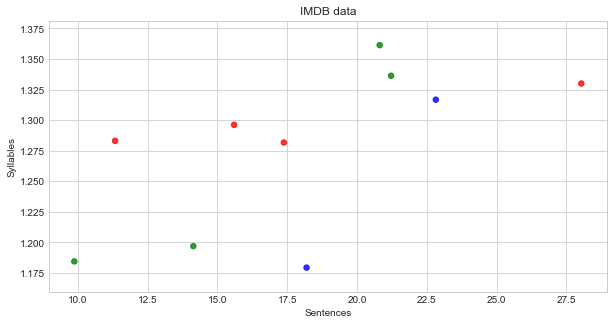

In [20]:
import pandas as pd

df = pd.read_csv( 'data.csv' )

colours = []

for index , column in df.iterrows():
    if column['genre'] == 'history':
        colours.append('red')
    elif column['genre'] == 'gothic':
        colours.append('blue')
    else:
        colours.append('green')




import matplotlib.pyplot as plt


plt.style.use('seaborn-whitegrid')

fig = plt.figure( figsize=( 10 , 5 ) )
ax = plt.axes()
ax.scatter( df['tokens'] / df['sentences'] , df['syllables']  / df['tokens']   , alpha=0.8, s=30, label=None , c = colours )
ax.set_xlabel('Sentences')
ax.set_ylabel('Syllables')


ax.set_title( 'IMDB data')

'''
for index , column in df.iterrows():
    ax.annotate( column['title'] , ( df['tokens'] / df['sentences'] , df['syllables']  / df['tokens']  ) )
'''

plt.show()